# Problema

Uma empresa de telecomunicações, necessita analisar um parâmetro referente aos clientes. 

Esse fator é o Churn, ou seja, a taxa de evasão os clientes. O objetivo do projeto é, utilizando métodos de classificação, definir se um determinado cliente, tem o potencial de permanecer ou não com a empresa.

Com esse modelo de Machine Learning, uma nova cliente, com o nome de Maria


## Importando bibliotecas

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando base de dados

In [2]:
dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## Tratamento de dados

In [3]:
dados.shape

(7043, 18)

In [4]:
dados.ServicoDeInternet.value_counts()

FibraOptica    3096
DSL            2421
Nao            1526
Name: ServicoDeInternet, dtype: int64

In [5]:
traducao_dic = {'Sim' : 1, 'Nao': 0}
dadosmodificados = dados [['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']]
dadosmodificados = dadosmodificados.replace(traducao_dic)
dadosmodificados.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


### Transformando valores categóricos em valores binários

In [6]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,34,56.95,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,2,53.85,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
3,0,45,42.30,0,1,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,0,2,70.70,1,0,0,0,1,0,1,...,1,0,0,0,1,0,0,1,0,0


In [7]:
dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
pd.set_option('display.max_columns', 39)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


### Nova cliente - Maria

In [9]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]


### Balanceamento dos dados

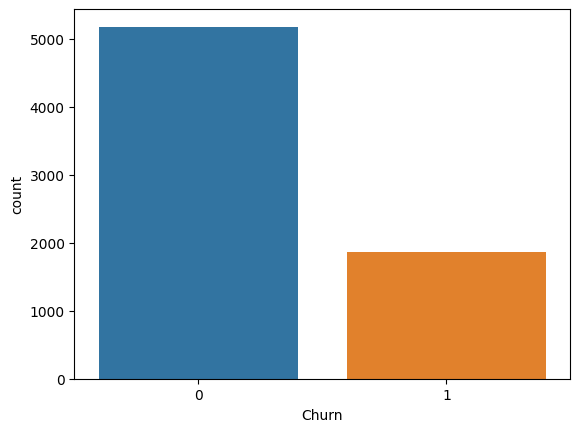

In [10]:
ax = sns.countplot(x='Churn', data=dados_final)

In [11]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta  

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

In [12]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [13]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,1,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0


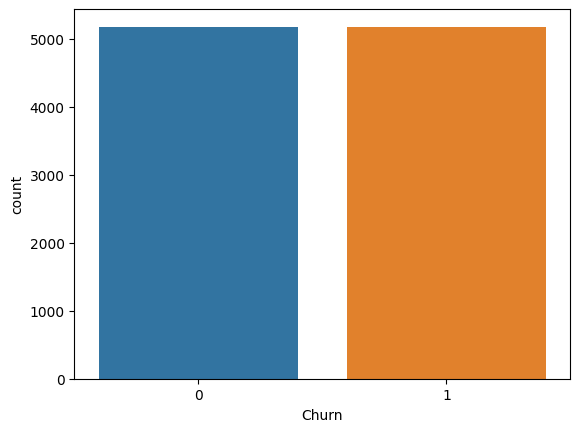

In [14]:
ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.


### Normalização dos dados utilizando a ferramenta de pré-processamento, StandardScaler

In [15]:
norm = StandardScaler()
x_normalizado = norm.fit_transform(X)
x_normalizado

array([[ 1.26542767, -0.52756038, -3.06083934, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
         2.08580171, -0.43617215],
       ...,
       [-0.79024667, -0.52756038,  0.32670777, ...,  1.30292044,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215],
       [-0.79024667, -0.52756038,  0.32670777, ..., -0.76750657,
        -0.47943196, -0.43617215]])

### Divisão dos dados para teste e para treino

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_normalizado, y, test_size=0.3, random_state=123)

70% dos dados representam a fatia de treino, e 30% dos dados representam a fatia de teste

### Implementando o modelo KNN (K-Nearest-Neighbor)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(x_treino, y_treino)
predito_knn = knn.predict(x_teste)
predito_knn

C:\Users\milan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

A métrica adotada foi a distância euclidiana

In [21]:
a = Xmaria_normalizado
b = x_normalizado[:10]

In [22]:
np.sqrt(np.sum(np.square(a - b)))

28.91868434269192

### Implementando o modelo BNB (Bernoulli Naive Bayes)

In [23]:
from sklearn.naive_bayes import BernoulliNB

In [24]:
mediana = np.median(x_treino)

In [49]:
bnb = BernoulliNB(binarize=mediana)
bnb.fit(x_treino, y_treino)
predito_bnb = bnb.predict(x_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

### Implementando o modelo Árvore de Decisão

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(x_treino, y_treino)
predito_dtc = dtc.predict(x_teste)
predito_dtc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [28]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01987306, 0.01892071,
       0.16274644, 0.22207834, 0.00929414, 0.00344576, 0.01033768,
       0.0019815 , 0.03131262, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01306512, 0.00368329, 0.02048744,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03611651, 0.16384005, 0.07422263, 0.01760111,
       0.02127213, 0.02182911, 0.01980513])

### Matriz confusão para cada um dos modelos

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
matriz_knn = confusion_matrix(y_teste, predito_knn)
matriz_bnb = confusion_matrix(y_teste, predito_bnb)
matriz_dtc = confusion_matrix(y_teste, predito_dtc)

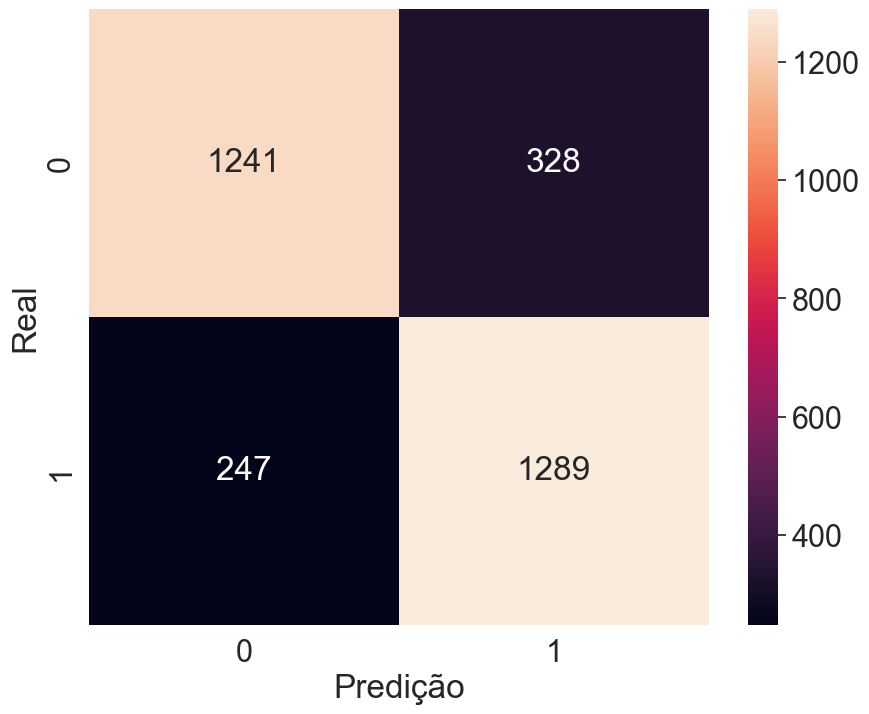

In [31]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz_knn, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

* A primeira linha e primeira coluna, representam os verdadeiros positivos, com 1241 sendo um valor relativamante alto;  
* A segunda coluna e primeira linha, representam os falsos negativos, com um valor de 328;  
* A segunda linha e primeira coluna, representam os falsos positivos, com um valor de 247;  
* A segunda linha e segunda coluna, representam, os verdadeiros negativos, com um valor de 1289.

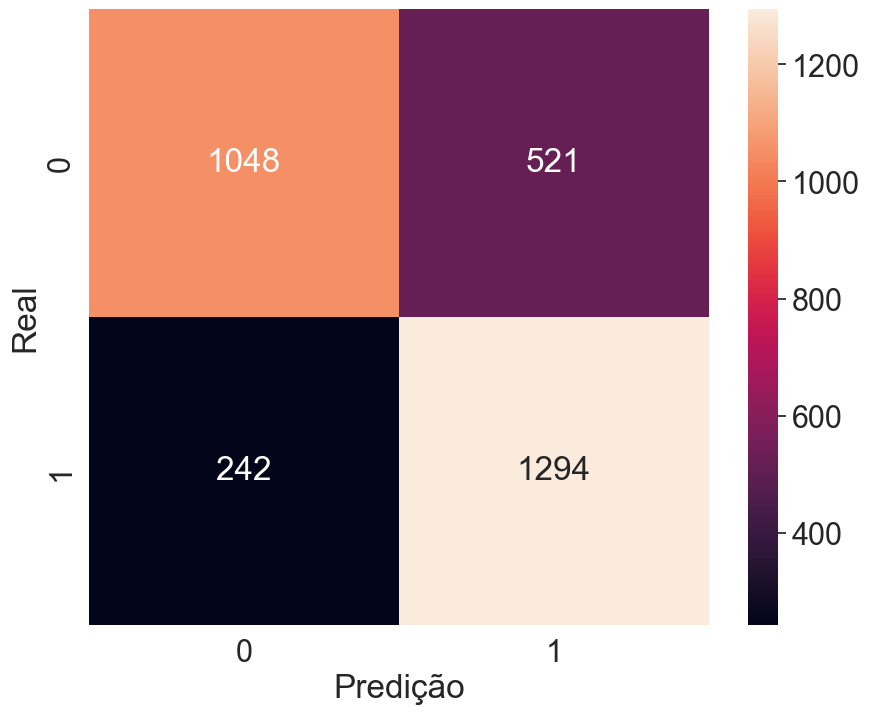

In [32]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz_bnb, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

* Verdadeiros positivos, com valor de 1048, inferior em relação ao modelo KNN;  
* Falsos negativos, com valor de 521, superior em relação ao modelo KNN;  
* Falsos positivos, com valor de 242, inferior, porém bem próximo, ao modelo KNN;  
* Verdadeiros negativos, com valor ded 1294, levemente superior, ao modelo KNN.

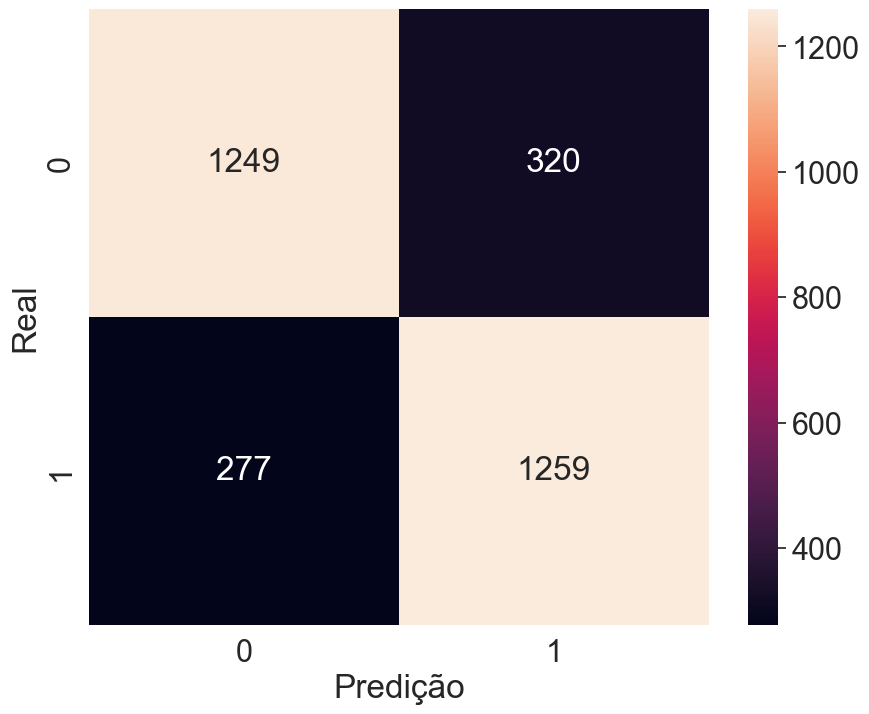

In [33]:
sns.set(font_scale=2)
plt.figure(figsize=(10,8))
ax = sns.heatmap(matriz_dtc, annot=True, fmt='d').set(xlabel='Predição', ylabel='Real')

* Verdadeiros positivos, com valor 1249, superior aos dois modelos anteriores;  
* Falsos negativos, com valor de 320, inferior aos dois modelos anteriores;  
* Falsos positivos, com valor de 277, superior aos dois modelos anteriores;  
* Verdaeiros negativos, com valor de 1259, inferior aos dois modelos anteriores.

O modelo de árvore de decisão, está tendo dificuldades, para classificar os positivos, em comparação com o modelo KNN e BNB

Legenda:

0 - Permaneceu com a empresa  
1 - Não permaneceu com a empresa

### Métrica de validação: Acurácia

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
print(f'A acurácia do modelo KNN é de {accuracy_score(y_teste, predito_knn)*100:.2f}%')
print(f'A acurácia do modelo BNB é de {accuracy_score(y_teste, predito_bnb)*100:.2f}%')
print(f'A acurácia do modelo de árvore de decisão é de {accuracy_score(y_teste, predito_dtc)*100:.2f}%')

A acurácia do modelo KNN é de 81.48%
A acurácia do modelo BNB é de 75.43%
A acurácia do modelo de árvore de decisão é de 80.77%


Considerando a métrica de acurácia, o modelo adotado seria o KNN

### Métrica de validação: Precisão

In [36]:
from sklearn.metrics import precision_score

In [37]:
print(f'A precisão do modelo KNN é de {precision_score(y_teste, predito_knn)*100:.2f}%')
print(f'A precisão do modelo BNB é de {precision_score(y_teste, predito_bnb)*100:.2f}%')
print(f'A precisão do modelo de árvore de decisão é de {precision_score(y_teste, predito_dtc)*100:.2f}%')

A precisão do modelo KNN é de 79.72%
A precisão do modelo BNB é de 71.29%
A precisão do modelo de árvore de decisão é de 79.73%


Considerando a métrica de precisão, o modelo adotado seria o de árvore de decisão

### Métrica de validação: Recall

In [38]:
from sklearn.metrics import recall_score, f1_score

In [39]:
print(f'A métrica Recall do modelo KNN é de {recall_score(y_teste, predito_knn)*100:.2f}%')
print(f'A métrica Recall do modelo BNB é de {recall_score(y_teste, predito_bnb)*100:.2f}%')
print(f'A métrica Recall do modelo de árvore de decisão é de {recall_score(y_teste, predito_dtc)*100:.2f}%')

A métrica Recall do modelo KNN é de 83.92%
A métrica Recall do modelo BNB é de 84.24%
A métrica Recall do modelo de árvore de decisão é de 81.97%


Considerando a métrica de recall, o modelo a ser adotados seria o BNB

### Escolhendo o melhor modelo para o problema proposto

In [40]:
print(f'Modelo KNN: {precision_score(y_teste, predito_knn)*100:.2f}%')
print(f'Modelo Bernoulli de Naive Bayes: {precision_score(y_teste, predito_bnb)*100:.2f}%')
print(f'Modelo Àrvore de Decisão: {precision_score(y_teste, predito_dtc)*100:.2f}%')


Modelo KNN: 79.72%
Modelo Bernoulli de Naive Bayes: 71.29%
Modelo Àrvore de Decisão: 79.73%


A métrica de precisão foi selecionada, para esse projeto. A proposta é definir as características dos clientes, que deixaram de fazer parte da empresa de telecomunicações, para assim, tomar decisões pra diminuir essa taxa de evasão.  

Essa métrica, leva em consideração os valores positivos que foram previstos de forma correta como um todo pelo modelo.

<div align="center">
<img src="precisao.png" />
</div>

Sendo assim, o modelo deve prever bem, quem está deixando a empresa.

# Prevendo a permanência ou não da cliente Maria, utilizando o modelo de Árvore de decisão

In [16]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))
Xmaria_normalizado

array([[-0.79024667, -0.52756038,  0.32670777,  0.8149851 , -0.41334384,
        -1.14934709, -0.97235471,  1.13017199, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.868102  , -0.44617598,
        -0.5173695 , -0.95871762, -0.44617598,  1.57389661,  1.04326198,
         2.24126814, -0.64211419, -1.13640148,  2.24126814, -0.52426638,
         1.18643645, -0.44617598, -0.77707385, -0.83100748, -0.44617598,
         1.26594459, -0.44648735, -1.35550751,  2.38155929, -0.42576817,
        -0.76750657, -0.47943196,  2.29267273]])

In [52]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(x_treino, y_treino)
predito_dtc = dtc.predict(Xmaria_normalizado)
if predito_dtc[0] == 0:
    print(f'De acordo com o modelo de árvore de decisão, a previsão é de que, Maria irá permanecer com a empresa!')
else:
    print(f'De acordo com o modelo de árvore de decisão, a previsão é de que, Maria não irá permanecer com a empresa!')

De acordo com o modelo de árvore de decisão, a previsão é de que, Maria irá permanecer com a empresa!
